<a href="https://colab.research.google.com/github/souaddev/Anomaly-Detection-in-ICS-Using-DTW/blob/main/HAI_DTW_Thesis_Souad_Asroubi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Import libraries**

In [ ]:
!pip install fastdtw
from fastdtw import fastdtw

In [ ]:
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 44.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Unins

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout, BatchNormalization, LSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer,r2_score
from sklearn.metrics import mean_squared_error
from keras.models import clone_model
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import RMSprop
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.metrics import roc_curve, roc_auc_score
from keras.models import Sequential
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, precision_score, make_scorer,r2_score, recall_score, f1_score, roc_curve, roc_auc_score,accuracy_score,classification_report,precision_recall_fscore_support,precision_recall_curve,mean_squared_error

# Setting visualization style
sns.set_style('whitegrid')


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/




# **2.   Data Loading**



In [ ]:
df_1 = '/content/drive/My Drive/hai-22.04/train1.csv'
df_2 = '/content/drive/My Drive/hai-22.04/test1.csv'
df_3 = '/content/drive/My Drive/hai-22.04/train2.csv'
df_4 = '/content/drive/My Drive/hai-22.04/test2.csv'
df_5 = '/content/drive/My Drive/hai-22.04/train3.csv'
df_6 = '/content/drive/My Drive/hai-22.04/test3.csv'
df_7 = '/content/drive/My Drive/hai-22.04/train4.csv'
df_8 = '/content/drive/My Drive/hai-22.04/test4.csv'
df_9 = '/content/drive/My Drive/hai-22.04/train5.csv'
df_10 = '/content/drive/My Drive/hai-22.04/train6.csv'


In [ ]:
df1 = pd.read_csv(df_1)
df2 = pd.read_csv(df_2)
df3 = pd.read_csv(df_3)
df4 = pd.read_csv(df_4)
df5 = pd.read_csv(df_5)
df6 = pd.read_csv(df_6)
df7 = pd.read_csv(df_7)
df8 = pd.read_csv(df_8)
df9 = pd.read_csv(df_9)
df10 = pd.read_csv(df_10)

In [ ]:
# combine both datasets
ds = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10]) #

In [ ]:
# Converting the Timestamp to a datetime and set it as an index
ds['timestamp'] = pd.to_datetime(ds['timestamp'])
ds= ds.set_index('timestamp')

In [ ]:
# display first 5 rows of the dataset

ds.head(3)

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-11 10:00:00,0.08771,0.88504,476.76703,1014.79321,26.92264,15.07713,595.06104,30.08042,15.50464,12.01019,...,7.08818,276.40338,-0.00087,14742,276.45758,267.90363,8.90254,9914,27170,0
2021-07-11 10:00:01,0.08771,0.88619,476.76703,1014.79321,26.92264,14.97197,531.50317,30.08423,16.20023,12.56714,...,7.08818,276.18634,0.00058,14781,278.91705,268.95258,8.90254,9914,27171,0
2021-07-11 10:00:02,0.08771,0.88836,476.76703,1014.79321,26.92264,14.90129,451.06253,30.09148,16.53352,14.48975,...,7.08818,279.85754,-0.00072,14831,278.89899,269.76636,8.90254,9914,27170,0


# **3. Data Preprocessing**




In [ ]:
# Check for missing values in the dataset
missing_values = ds.isnull().sum()

# Count the number of missing values in each column
missing_values_count = missing_values[missing_values > 0]

print(missing_values_count)

Series([], dtype: int64)


> The dataset does not contain any missing values, so we don't need to handle missing data through imputation or dropping rows/columns.


In [ ]:
attack_values = ds['Attack'].unique()

attack_values

array([0, 1])

> For the sake of simplicity, we will rename the 'Attack' column to  'label'

In [ ]:
ds.rename(columns={'Attack': 'label'}, inplace=True)

In [ ]:
ds.head(1)
ds.shape

(1365602, 87)

In [ ]:
ds.drop_duplicates(inplace=True)

In [ ]:
ds.shape

(1365602, 87)

In [ ]:
# Identify constant features based on standard deviation
constant_features_std = [col for col in ds.columns if ds[col].std() == 0]

print("Constant features based on standard deviation:", constant_features_std)

Constant features based on standard deviation: ['P1_PIT01_HH', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD', 'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P2_RTR', 'P2_TripEx', 'P2_VTR01', 'P2_VTR02', 'P2_VTR03', 'P2_VTR04']


In [ ]:
# Remove constant features from the DataFrame
ds = ds.drop(columns=constant_features_std)

In [ ]:
# Classify numerical and categorical features
numerical_features = [column for column in ds.columns if ds[column].nunique() > 10]
categorical_features = [column for column in ds.columns if ds[column].nunique() <= 10]
print(len(numerical_features), 'Numerical Features :', numerical_features, len(categorical_features), 'Categorical Features :', categorical_features)

61 Numerical Features : ['P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_B4005', 'P1_B400B', 'P1_B4022', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV02D', 'P1_FCV02Z', 'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01', 'P1_FT01Z', 'P1_FT02', 'P1_FT02Z', 'P1_FT03', 'P1_FT03Z', 'P1_LCV01D', 'P1_LCV01Z', 'P1_LIT01', 'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D', 'P1_PCV02Z', 'P1_PIT01', 'P1_PIT02', 'P1_PP04', 'P1_PP04SP', 'P1_TIT01', 'P1_TIT02', 'P1_TIT03', 'P2_24Vdc', 'P2_AutoSD', 'P2_ManualSD', 'P2_SCO', 'P2_SCST', 'P2_SIT01', 'P2_VIBTR01', 'P2_VIBTR02', 'P2_VIBTR03', 'P2_VIBTR04', 'P2_VT01', 'P3_FIT01', 'P3_LCP01D', 'P3_LCV01D', 'P3_LIT01', 'P3_PIT01', 'P4_HT_FD', 'P4_HT_PO', 'P4_HT_PS', 'P4_LD', 'P4_ST_FD', 'P4_ST_GOV', 'P4_ST_LD', 'P4_ST_PO', 'P4_ST_PS', 'P4_ST_PT01', 'P4_ST_TT01'] 10 Categorical Features : ['P2_ATSW_Lamp', 'P2_AutoGO', 'P2_Emerg', 'P2_MASW', 'P2_MASW_Lamp', 'P2_ManualGO', 'P2_OnOff', 'P3_LH01', 'P3_LL01', 'label']


In [ ]:

# Display unique values in each column
for column in categorical_features:
    unique_values = ds[column].unique()
    print(f"Unique Values in '{column}' Column:")
    print(unique_values)
    print("\n")

Unique Values in 'P2_ATSW_Lamp' Column:
[1 0]


Unique Values in 'P2_AutoGO' Column:
[1 0]


Unique Values in 'P2_Emerg' Column:
[0 1]


Unique Values in 'P2_MASW' Column:
[0 1]


Unique Values in 'P2_MASW_Lamp' Column:
[0 1]


Unique Values in 'P2_ManualGO' Column:
[0 1]


Unique Values in 'P2_OnOff' Column:
[1 0]


Unique Values in 'P3_LH01' Column:
[70 80]


Unique Values in 'P3_LL01' Column:
[25 20]


Unique Values in 'label' Column:
[0 1]




In [ ]:
# List of categorical features
cols = ['P3_LH01', 'P3_LL01']

# Display unique values and their counts in each column
for column in cols:
    # Get the counts of unique values
    value_counts = ds[column].value_counts()
    print(f"Counts of Unique Values in '{column}' Column:")
    print(value_counts)
    print("\n")


Counts of Unique Values in 'P3_LH01' Column:
P3_LH01
70    915601
80    450001
Name: count, dtype: int64


Counts of Unique Values in 'P3_LL01' Column:
P3_LL01
25    915601
20    450001
Name: count, dtype: int64




In [ ]:
# based on the value count in the previous cell
# I will replace 70 and 25 by 1
# I will replace 80 and 20 by 0
# after performing downsampling, I can map them to their original values.
ds['P3_LH01'] = ds['P3_LH01'].replace({70: 1, 80: 0})
ds['P3_LL01'] = ds['P3_LL01'].replace({25: 1, 20: 0})

In [ ]:
# check the unique values of each categorical column again
# Display unique values in each column
for column in categorical_features:
    unique_values = ds[column].unique()
    print(f"Unique Values in '{column}' Column:")
    print(unique_values)
    print("\n")

Unique Values in 'P2_ATSW_Lamp' Column:
[1 0]


Unique Values in 'P2_AutoGO' Column:
[1 0]


Unique Values in 'P2_Emerg' Column:
[0 1]


Unique Values in 'P2_MASW' Column:
[0 1]


Unique Values in 'P2_MASW_Lamp' Column:
[0 1]


Unique Values in 'P2_ManualGO' Column:
[0 1]


Unique Values in 'P2_OnOff' Column:
[1 0]


Unique Values in 'P3_LH01' Column:
[1 0]


Unique Values in 'P3_LL01' Column:
[1 0]


Unique Values in 'label' Column:
[0 1]




# **Apply SMOTE-NC**


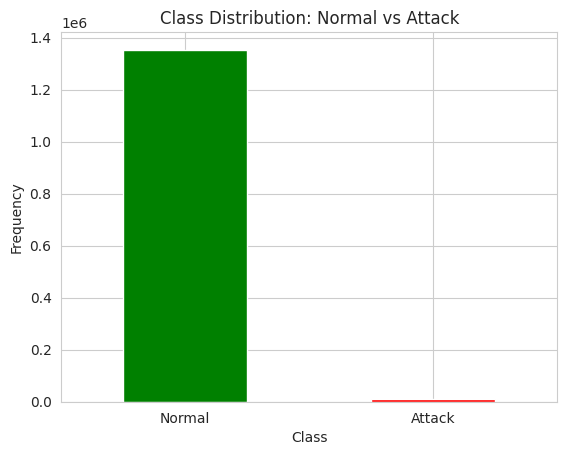

In [ ]:
# Count the number of occurrences of each class in the target series
class_distribution = ds['label'].value_counts()

# Plotting the class distribution as a bar chart
fig, ax = plt.subplots()
class_distribution.plot(kind='bar', color=['green', 'red'], ax=ax)

plt.title('Class Distribution: Normal vs Attack')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(class_distribution)), labels=['Normal', 'Attack'], rotation=0)  # Set text labels and properties

plt.show()


In [ ]:
target = ds['label']
target = target.reset_index(drop=True)

ds = ds.drop('label', axis=1)

In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTENC

In [ ]:
# Item to be dropped
item_to_drop = 'label'

# Creating a new list without the item to drop
categorical_features = [item for item in categorical_features if item != item_to_drop]

print(categorical_features)


['P2_ATSW_Lamp', 'P2_AutoGO', 'P2_Emerg', 'P2_MASW', 'P2_MASW_Lamp', 'P2_ManualGO', 'P2_OnOff', 'P3_LH01', 'P3_LL01']


In [ ]:
# Convert column names to indices
categorical_features_indices = [ds.columns.get_loc(name) for name in categorical_features]

# Use the indices for SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)

# Fit and resample the dataset
X_resampled, y_resampled = smote_nc.fit_resample(ds, target)

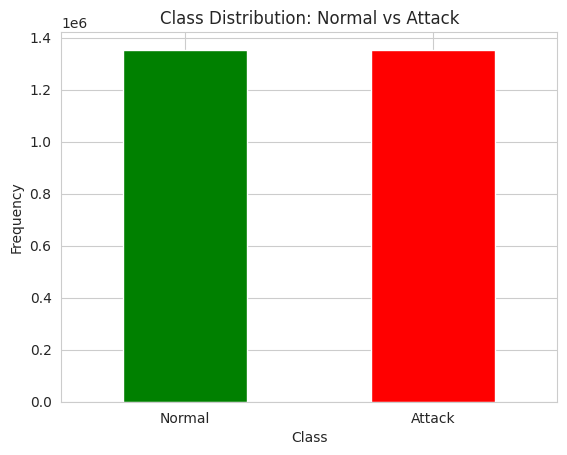

In [ ]:
# Count the number of occurrences of each class in the target series
class_distribution = y_resampled.value_counts()

# Plotting the class distribution as a bar chart
fig, ax = plt.subplots()
class_distribution.plot(kind='bar', color=['green', 'red'], ax=ax)

plt.title('Class Distribution: Normal vs Attack')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(class_distribution)), labels=['Normal', 'Attack'], rotation=0)  # Set text labels and properties

plt.show()


In [ ]:
X_resampled, y_resampled = smote_nc.fit_resample(ds, target)


0          0
1          0
2          0
3          0
4          0
          ..
1804757    1
1804758    1
1804759    1
1804760    1
1804761    1
Name: label, Length: 1804762, dtype: int64

## **Normalization**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

num_features = X_resampled[numerical_features]
cat_features = X_resampled[categorical_features]

# Min-Max scaling for numerical features
scaler = MinMaxScaler()
numerical_data_scaled = scaler.fit_transform(num_features)
numerical_data_scaled_df = pd.DataFrame(numerical_data_scaled, columns=num_features.columns)

# Since categorical features are already binary, just ensure they are in the correct format
cat_features_df = pd.DataFrame(cat_features, columns=categorical_features)

# Concatenate numerical and categorical dataframes
preprocessed_ds = pd.concat([numerical_data_scaled_df, cat_features_df], axis=1)

print(preprocessed_ds)


         P1_B2004  P1_B2016  P1_B3004  P1_B3005  P1_B4002  P1_B4005  P1_B400B  \
0        0.226130  0.132221  0.798452  0.538147  0.209725  0.150771  0.184712   
1        0.226130  0.133566  0.798452  0.538147  0.209725  0.149720  0.164743   
2        0.226130  0.136102  0.798452  0.538147  0.209725  0.149013  0.139470   
3        0.226130  0.140521  0.798452  0.538147  0.209725  0.148225  0.124805   
4        0.226130  0.140252  0.798452  0.538147  0.209725  0.147309  0.117941   
...           ...       ...       ...       ...       ...       ...       ...   
1804757  0.167058  0.118895  0.555337  0.637042  0.033609  0.000000  0.059465   
1804758  0.659597  0.401110  0.555337  0.281349  0.033609  0.465934  0.448926   
1804759  0.964903  0.463242  0.915455  0.362970  0.033609  0.000000  0.006096   
1804760  0.371563  0.336474  0.582156  0.499615  0.060821  0.071129  0.076960   
1804761  0.057068  0.345719  0.618640  0.359786  0.060821  0.124181  0.076078   

         P1_B4022  P1_FCV01

In [ ]:
preprocessed_ds.info()
preprocessed_ds.tail(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804762 entries, 0 to 1804761
Data columns (total 70 columns):
 #   Column        Dtype  
---  ------        -----  
 0   P1_B2004      float64
 1   P1_B2016      float64
 2   P1_B3004      float64
 3   P1_B3005      float64
 4   P1_B4002      float64
 5   P1_B4005      float64
 6   P1_B400B      float64
 7   P1_B4022      float64
 8   P1_FCV01D     float64
 9   P1_FCV01Z     float64
 10  P1_FCV02D     float64
 11  P1_FCV02Z     float64
 12  P1_FCV03D     float64
 13  P1_FCV03Z     float64
 14  P1_FT01       float64
 15  P1_FT01Z      float64
 16  P1_FT02       float64
 17  P1_FT02Z      float64
 18  P1_FT03       float64
 19  P1_FT03Z      float64
 20  P1_LCV01D     float64
 21  P1_LCV01Z     float64
 22  P1_LIT01      float64
 23  P1_PCV01D     float64
 24  P1_PCV01Z     float64
 25  P1_PCV02D     float64
 26  P1_PCV02Z     float64
 27  P1_PIT01      float64
 28  P1_PIT02      float64
 29  P1_PP04       float64
 30  P1_PP04SP     floa

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_ST_TT01,P2_ATSW_Lamp,P2_AutoGO,P2_Emerg,P2_MASW,P2_MASW_Lamp,P2_ManualGO,P2_OnOff,P3_LH01,P3_LL01
1804662,0.501382,0.355002,0.237195,0.382617,0.033609,0.023383,0.015944,0.097298,0.016953,0.016079,...,0.187500,1,1,0,0,0,0,1,1,1
1804663,0.693727,0.614261,0.748177,0.418870,0.033609,0.061400,0.014474,0.163097,0.072490,0.080406,...,0.204942,1,1,0,0,0,0,1,1,1
1804664,0.496753,0.524142,0.273342,0.677680,0.033609,0.130284,0.067468,0.145452,0.123785,0.073615,...,0.084302,1,1,0,0,0,0,1,1,1
1804665,0.504237,0.144657,0.720669,0.465997,0.037756,0.000000,0.005786,0.040028,0.057263,0.053002,...,0.238372,1,1,0,0,0,0,1,1,1
1804666,0.723021,0.550241,0.273342,0.616358,0.033609,0.010495,0.076164,0.142752,0.088056,0.085387,...,0.361919,1,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804757,0.167058,0.118895,0.555337,0.637042,0.033609,0.000000,0.059465,0.045371,0.072325,0.071055,...,0.343023,1,1,0,0,0,0,1,1,1
1804758,0.659597,0.401110,0.555337,0.281349,0.033609,0.465934,0.448926,0.102871,0.217793,0.212785,...,0.225291,1,1,0,0,0,0,1,1,1
1804759,0.964903,0.463242,0.915455,0.362970,0.033609,0.000000,0.006096,0.105822,0.040983,0.034580,...,0.344477,1,1,0,0,0,0,1,1,1
1804760,0.371563,0.336474,0.582156,0.499615,0.060821,0.071129,0.076960,0.121106,0.133131,0.131417,...,0.274709,1,1,0,0,0,0,1,1,1


In [ ]:
# Add the 'Normal/Attack' label back to the preprocessed data
final_df=preprocessed_ds
final_df['Attack'] = y_resampled
# Save preprocessed data to drive
final_df.to_csv('/content/drive/My Drive/swat/HAI_preprocessed_data.csv', index=False)

#**Load Preprocesed Data**

In [ ]:
def evaluate_model_performance(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    auc = roc_auc_score(true_labels, predicted_labels)

    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels))

In [ ]:
# Plot training & validation loss values
def plot_training_validation_loss(history):
  plt.figure(figsize=(10, 5))
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc='upper right')
  plt.show()

In [ ]:
def plot_roc_curve(true_labels, predicted_probabilities,name):
    # Calculate ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
    auc = roc_auc_score(true_labels, predicted_probabilities)

    # Plotting the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    roc_data = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
    roc_data.to_csv('/content/drive/My Drive/souad_models/'+name+'_roc_curve.csv', index=False)

In [ ]:
final_df = pd.read_csv('/content/drive/My Drive/swat/HAI_preprocessed_data.csv')

preprocessed_ds = final_df.drop(columns=['Attack'])
y_resampled = final_df['Attack']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_ds, y_resampled, test_size=0.3, random_state=42)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (1263333, 70)
Test data shape: (541429, 70)


In [ ]:
X_train.head(1)

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_ST_TT01,P2_ATSW_Lamp,P2_AutoGO,P2_Emerg,P2_MASW,P2_MASW_Lamp,P2_ManualGO,P2_OnOff,P3_LH01,P3_LL01
1683660,0.501382,0.384581,0.237195,0.382617,0.033609,0.250634,0.238092,0.105821,0.139109,0.153381,...,0.138081,1,1,0,0,0,0,1,1,1


# **5.  Baseline**

##Autoencoder

In [ ]:
X_train_normal = X_train[y_train == 0]
n_features= X_train_normal.shape[1]

In [ ]:
dropout_rate = 0.5
def create_model(n_units=100, activation='sigmoid', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=n_units, activation=activation, input_dim=n_features))
    model.add(Dropout(0.5))
    model.add(Dense(units=n_units // 4, activation=activation))
    model.add(Dense(units=n_features, activation='linear'))
    model.compile(loss='mse', optimizer=optimizer,metrics=['accuracy'])
    return model

In [ ]:
# Create and train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = create_model()
history= model.fit(X_train_normal, X_train_normal, epochs=100, batch_size=512, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/100
1482/1482 [==============================] - 7s 4ms/step - loss: 0.0382 - accuracy: 0.0977 - val_loss: 0.0145 - val_accuracy: 0.0389
Epoch 2/100
1482/1482 [==============================] - 6s 4ms/step - loss: 0.0148 - accuracy: 0.1187 - val_loss: 0.0099 - val_accuracy: 0.1540
Epoch 3/100
1482/1482 [==============================] - 6s 4ms/step - loss: 0.0108 - accuracy: 0.1498 - val_loss: 0.0066 - val_accuracy: 0.2255
Epoch 4/100
1482/1482 [==============================] - 6s 4ms/step - loss: 0.0084 - accuracy: 0.1498 - val_loss: 0.0050 - val_accuracy: 0.2020
Epoch 5/100
1482/1482 [==============================] - 6s 4ms/step - loss: 0.0071 - accuracy: 0.1590 - val_loss: 0.0040 - val_accuracy: 0.1214
Epoch 6/100
1482/1482 [==============================] - 6s 4ms/step - loss: 0.0062 - accuracy: 0.1664 - val_loss: 0.0032 - val_accuracy: 0.0853
Epoch 7/100
1482/1482 [==============================] - 6s 4ms/step - loss: 0.0056 - accuracy: 0.1980 - val_loss: 0.0028 - val_ac

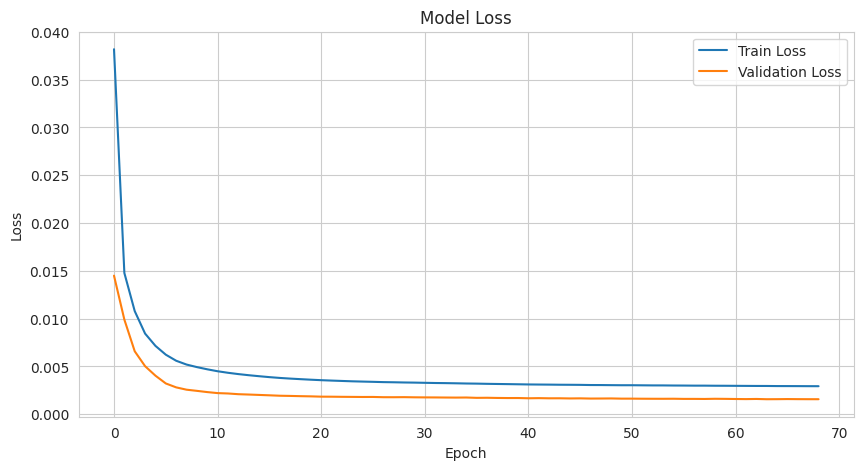

In [ ]:
plot_training_validation_loss(history)

In [ ]:
X_test_predictions = model.predict(X_test)

mae = np.mean(np.abs(X_test_predictions - X_test), axis=1)

16920/16920 [==============================] - 21s 1ms/step


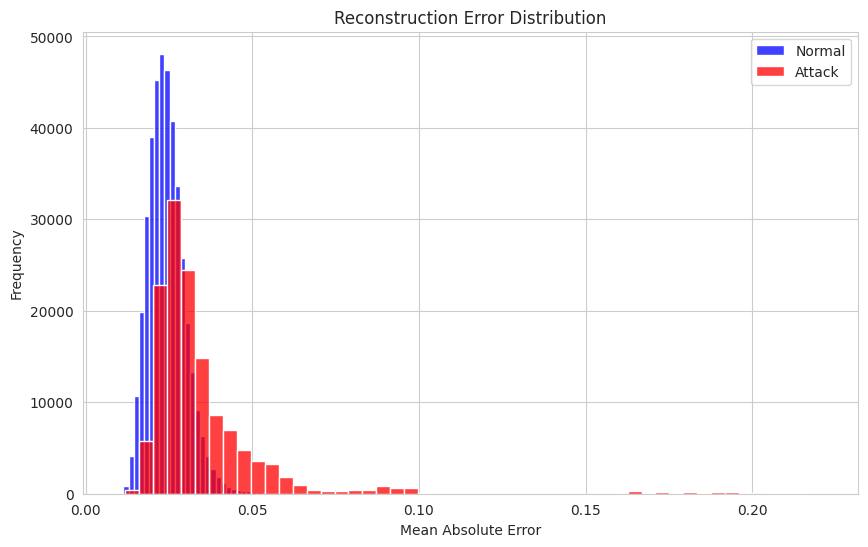

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(mae[y_test == 0], bins=50, color='blue', label='Normal')
sns.histplot(mae[y_test == 1], bins=50, color='red', label='Attack')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
#Find the best threshold
thresholds = np.linspace(min(mae), max(mae), num=100)
precision_list, recall_list, f1_list = [], [], []

best_f1 = 0
best_threshold = 0

for threshold in thresholds:
    predicted_anomalies = (mae > threshold).astype(int)
    precision = precision_score(y_test, predicted_anomalies)
    recall = recall_score(y_test, predicted_anomalies)
    f1 = f1_score(y_test, predicted_anomalies)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
print('The optimal treshold is : ',best_threshold)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The optimal treshold is :  0.02690371229690933


In [ ]:
y_pred_b_ae = (mae > best_threshold).astype(int)
evaluate_model_performance(y_test,y_pred_b_ae)

Accuracy: 0.6973
Confusion Matrix:
[[289952 115664]
 [ 48225  87588]]
Precision: 0.4309
Recall: 0.6449
F1-score: 0.5166
AUC: 0.6799

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78    405616
           1       0.43      0.64      0.52    135813

    accuracy                           0.70    541429
   macro avg       0.64      0.68      0.65    541429
weighted avg       0.75      0.70      0.71    541429



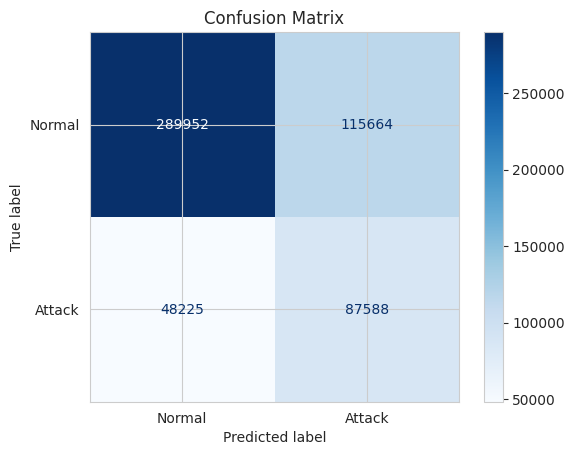

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred_b_ae)


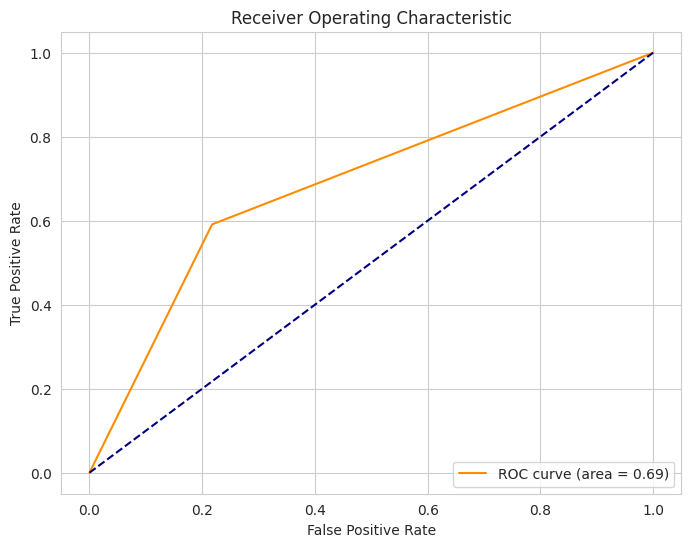

In [ ]:
plot_roc_curve(y_test, y_pred_b_ae,'HAI_Autoencoder_Baseline')

##LSTM

In [ ]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
def create_lstm_model(units, dropout_rate=0.2, optimizer='RMSprop'):
    model = Sequential([
        LSTM(units=units, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
        Dropout(dropout_rate),
        LSTM(units=units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    if optimizer == 'RMSprop':
        opt = RMSprop(learning_rate=0.00001)
    else:
        opt = optimizer
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
lstm_model = create_lstm_model(units=256,dropout_rate=0.5)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)
history=lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=1024, validation_split=0.2, verbose=2, callbacks=[early_stopping] )


Epoch 1/50
987/987 - 38s - loss: 0.6186 - accuracy: 0.7448 - val_loss: 0.5493 - val_accuracy: 0.7504 - 38s/epoch - 39ms/step
Epoch 2/50
987/987 - 35s - loss: 0.5236 - accuracy: 0.7503 - val_loss: 0.4991 - val_accuracy: 0.7504 - 35s/epoch - 35ms/step
Epoch 3/50
987/987 - 35s - loss: 0.4763 - accuracy: 0.7503 - val_loss: 0.4484 - val_accuracy: 0.7504 - 35s/epoch - 35ms/step
Epoch 4/50
987/987 - 35s - loss: 0.4301 - accuracy: 0.7521 - val_loss: 0.4104 - val_accuracy: 0.7587 - 35s/epoch - 35ms/step
Epoch 5/50
987/987 - 35s - loss: 0.4013 - accuracy: 0.7812 - val_loss: 0.3888 - val_accuracy: 0.7992 - 35s/epoch - 35ms/step
Epoch 6/50
987/987 - 35s - loss: 0.3827 - accuracy: 0.8069 - val_loss: 0.3723 - val_accuracy: 0.8168 - 35s/epoch - 35ms/step
Epoch 7/50
987/987 - 35s - loss: 0.3671 - accuracy: 0.8176 - val_loss: 0.3577 - val_accuracy: 0.8219 - 35s/epoch - 35ms/step
Epoch 8/50
987/987 - 35s - loss: 0.3536 - accuracy: 0.8206 - val_loss: 0.3455 - val_accuracy: 0.8222 - 35s/epoch - 35ms/step


In [ ]:
predictions = lstm_model.predict(X_test_reshaped)
#Find best treshold
precisions, recalls, thresholds = precision_recall_curve(y_test, predictions)

# Calculate the F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
f1_scores = np.nan_to_num(f1_scores)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print("Best threshold: ", optimal_threshold)
print("Best F1-score: ", f1_scores[optimal_idx])

predictions_binary1 = (predictions >optimal_threshold).astype(int)

16920/16920 [==============================] - 51s 3ms/step
Best threshold:  0.32131642
Best F1-score:  0.7416402189411712


In [ ]:
predictions = lstm_model.predict(X_test_reshaped)
#Find best treshold
precisions, recalls, thresholds = precision_recall_curve(y_test, predictions)

# Calculate the F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
f1_scores = np.nan_to_num(f1_scores)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print("Best threshold: ", optimal_threshold)
print("Best F1-score: ", f1_scores[optimal_idx])

predictions_binary1 = (predictions >optimal_threshold).astype(int)

16920/16920 [==============================] - 103s 6ms/step
Best threshold:  0.4767704
Best F1-score:  0.5507678218136325


In [ ]:
evaluate_model_performance(y_test ,predictions_binary1)

Accuracy: 0.8444
Confusion Matrix:
[[336244  69372]
 [ 14884 120929]]
Precision: 0.6355
Recall: 0.8904
F1-score: 0.7416
AUC: 0.8597

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89    405616
           1       0.64      0.89      0.74    135813

    accuracy                           0.84    541429
   macro avg       0.80      0.86      0.82    541429
weighted avg       0.88      0.84      0.85    541429



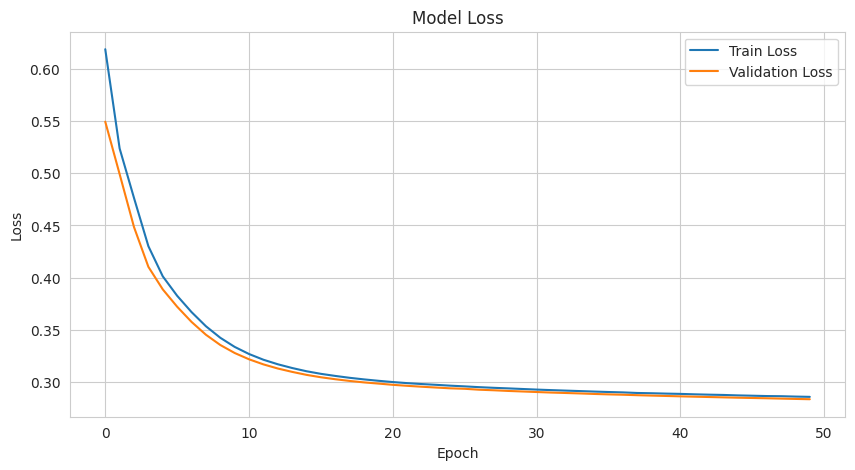

In [ ]:
plot_training_validation_loss(history)

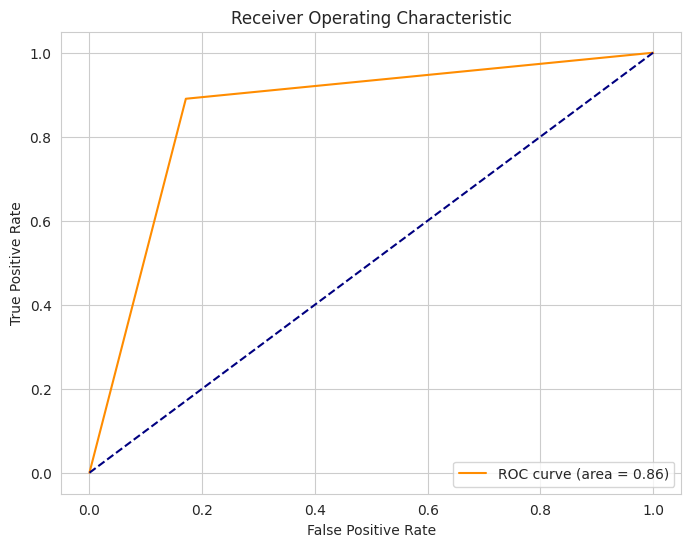

In [ ]:
plot_roc_curve(y_test, predictions_binary1,'HAI2_LSTM_Baseline')

##Isolation Forest

In [ ]:
# Calculate contamination as the proportion of outliers
outlier_count = np.sum(y_train == 1)
total_count = len(y_train)

contamination_estimate = outlier_count / total_count
print("Estimated contamination parameter: ", contamination_estimate)

Estimated contamination parameter:  0.24985784130726432


In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(contamination_estimate),
                             max_features=0.6, bootstrap=False, n_jobs=1, random_state=42, verbose=0)

model.fit(X_train)
predictions = model.predict(X_test)

binary_predictions = [1 if pred == -1 else 0 for pred in predictions]
evaluate_model_performance(y_test, binary_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy: 0.6419
Confusion Matrix:
[[303890 101726]
 [ 92138  43675]]
Precision: 0.3004
Recall: 0.3216
F1-score: 0.3106
AUC: 0.5354

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76    405616
           1       0.30      0.32      0.31    135813

    accuracy                           0.64    541429
   macro avg       0.53      0.54      0.53    541429
weighted avg       0.65      0.64      0.65    541429



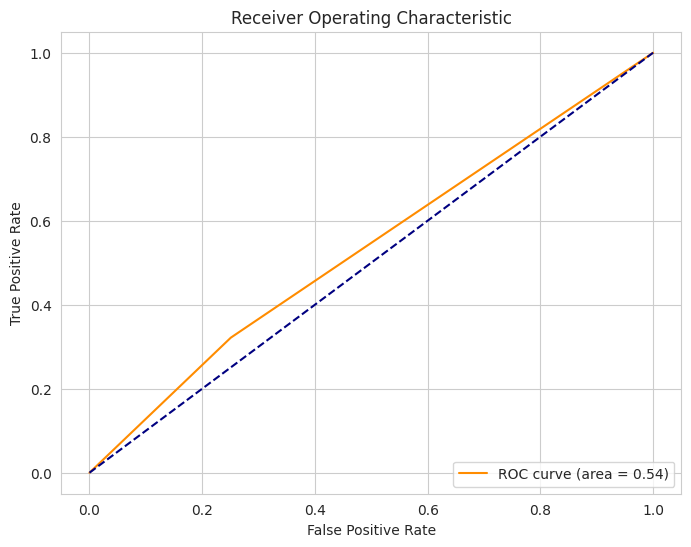

In [ ]:
plot_roc_curve(y_test, binary_predictions,'HAI_IsolationF_Baseline')

#**DTW PairWise**

##DTW Matrix Calculation

In [ ]:
#Applying PCA
# PCA transformation
pca = PCA(n_components=27)  # Adjust based on your requirement
principalComponents = pca.fit_transform(preprocessed_ds)

# Create a DataFrame of the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = [f'PCA {i+1}' for i in range(principalComponents.shape[1])])

# Output the explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.47951852 0.08914941 0.06567422 0.05760969 0.04516242 0.03405757
 0.02822967 0.02404023 0.02160983 0.0182068  0.01626384 0.01450454
 0.01223176 0.01160224 0.01085215 0.01011012 0.00940782 0.00881904
 0.00736184 0.00627658 0.0043718  0.00426319 0.00306443 0.00253765
 0.00189589 0.0018439  0.00157795]


In [ ]:
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804762 entries, 0 to 1804761
Data columns (total 27 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PCA 1   float64
 1   PCA 2   float64
 2   PCA 3   float64
 3   PCA 4   float64
 4   PCA 5   float64
 5   PCA 6   float64
 6   PCA 7   float64
 7   PCA 8   float64
 8   PCA 9   float64
 9   PCA 10  float64
 10  PCA 11  float64
 11  PCA 12  float64
 12  PCA 13  float64
 13  PCA 14  float64
 14  PCA 15  float64
 15  PCA 16  float64
 16  PCA 17  float64
 17  PCA 18  float64
 18  PCA 19  float64
 19  PCA 20  float64
 20  PCA 21  float64
 21  PCA 22  float64
 22  PCA 23  float64
 23  PCA 24  float64
 24  PCA 25  float64
 25  PCA 26  float64
 26  PCA 27  float64
dtypes: float64(27)
memory usage: 371.8 MB


In [ ]:
principalDf.to_csv('/content/drive/My Drive/swat/HAI_pca_data.csv', index=False)

In [ ]:
def create_sequences(data, window_size):
    sequences = []
    for start in range(len(data) - window_size + 1):
        end = start + window_size
        sequences.append(data[start:end])
    return np.array(sequences)

In [ ]:
def calculate_fastdtw_pairs(df, features, window_size):
    dtw_distances_df = pd.DataFrame(index=df.index[window_size - 1:])
    n = len(features)

    # Calculate FastDTW distances for each critical pair within sliding windows
    for i in range(n):
        for j in range(i + 1, n):
            series_i = create_sequences(df[features[i]].values, window_size)
            series_j = create_sequences(df[features[j]].values, window_size)

            # Computing FastDTW distance for each window
            dtw_distances = [fastdtw(series_i[k], series_j[k], dist= 2)[0] for k in range(len(series_i))]

            # Create a new feature name for the DTW distance
            feature_name = f'FastDTW_{features[i]}_{features[j]}'

            # Add the FastDTW distances as a new feature in the DataFrame
            dtw_distances_df[feature_name] = dtw_distances

    return dtw_distances_df


In [ ]:
window_size = 10
dtw_distances_df= calculate_fastdtw_pairs(principalDf, principalDf.columns.tolist(), window_size)

<ipython-input-96-397f13eea5c7>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dtw_distances_df[feature_name] = dtw_distances
<ipython-input-96-397f13eea5c7>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dtw_distances_df[feature_name] = dtw_distances
<ipython-input-96-397f13eea5c7>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [ ]:
#Save the dtw_distances_df in csv format for future use
file_path = '/content/drive/My Drive/HAI_dtw_distances_finale.csv'
dtw_distances_df.to_csv(file_path)

In [ ]:
print(dtw_distances_df)

         FastDTW_PCA 1_PCA 2  FastDTW_PCA 1_PCA 3  FastDTW_PCA 1_PCA 4  \
9                  16.175004             5.584245             7.061794   
10                 16.442897             6.120790             7.314572   
11                 16.418060             6.136121             7.341009   
12                 16.388059             6.158778             7.334227   
13                 16.365763             6.198935             7.335343   
...                      ...                  ...                  ...   
1804757            10.359376            11.109300            10.182086   
1804758             9.043207             8.441656             9.218958   
1804759             9.832793             9.650980             9.983563   
1804760             9.940360             9.675352             9.950971   
1804761            10.606323            10.859985            10.378680   

         FastDTW_PCA 1_PCA 5  FastDTW_PCA 1_PCA 6  FastDTW_PCA 1_PCA 7  \
9                   3.856229         

In [ ]:
dtw_distances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804753 entries, 9 to 1804761
Columns: 351 entries, FastDTW_PCA 1_PCA 2 to FastDTW_PCA 26_PCA 27
dtypes: float64(351)
memory usage: 4.7 GB


In [ ]:
dtw_distances_df.head(2)

,FastDTW_PCA 1_PCA 2,FastDTW_PCA 1_PCA 3,FastDTW_PCA 1_PCA 4,FastDTW_PCA 1_PCA 5,FastDTW_PCA 1_PCA 6,FastDTW_PCA 1_PCA 7,FastDTW_PCA 1_PCA 8,FastDTW_PCA 1_PCA 9,FastDTW_PCA 1_PCA 10,FastDTW_PCA 1_PCA 11,...,FastDTW_PCA 23_PCA 24,FastDTW_PCA 23_PCA 25,FastDTW_PCA 23_PCA 26,FastDTW_PCA 23_PCA 27,FastDTW_PCA 24_PCA 25,FastDTW_PCA 24_PCA 26,FastDTW_PCA 24_PCA 27,FastDTW_PCA 25_PCA 26,FastDTW_PCA 25_PCA 27,FastDTW_PCA 26_PCA 27
9,16.175004,5.584245,7.061794,3.856229,9.744924,8.580961,3.714245,6.435544,3.224256,6.606711,...,0.889270,0.214939,1.555173,2.131348,0.582645,0.665903,1.242078,1.248548,1.824723,0.571652
10,16.442897,6.120790,7.314572,4.055882,9.687565,8.862941,3.942837,6.597180,3.816719,6.959583,...,0.925095,0.264406,1.581014,2.134990,0.636469,0.655919,1.209894,1.292388,1.846364,0.501604


In [ ]:
window_size=10
y_df_aligned = y_df[(window_size - 1):]

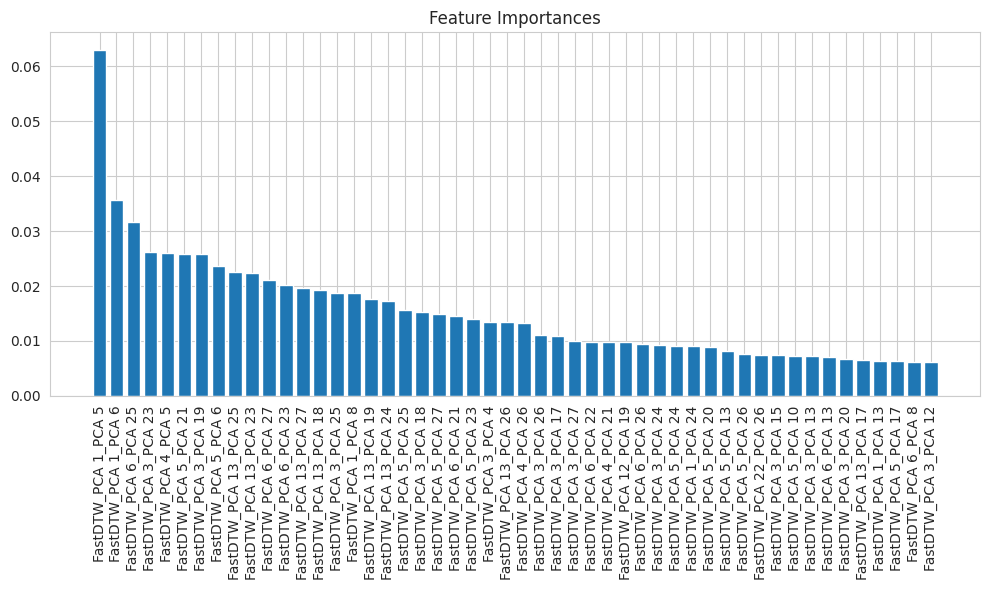

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(dtw_distances_df, y_df_aligned)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# top 50 feature
top_n_indices = indices[:50]
reduced_df = dtw_distances_df.iloc[:, top_n_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(len(top_n_indices)), importances[top_n_indices], align='center')
plt.xticks(range(len(top_n_indices)), dtw_distances_df.columns[top_n_indices], rotation=90)
plt.tight_layout()
plt.show()

file_path = '/content/drive/My Drive/HAI_reduced_dtw_distances.csv'
reduced_df.to_csv(file_path, index=False)

In [ ]:
merged_df = pd.concat([reduced_df, y_df_aligned], axis=1)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804762 entries, 0 to 1804761
Data columns (total 51 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   FastDTW_PCA 1_PCA 5    float64
 1   FastDTW_PCA 1_PCA 6    float64
 2   FastDTW_PCA 6_PCA 25   float64
 3   FastDTW_PCA 3_PCA 23   float64
 4   FastDTW_PCA 4_PCA 5    float64
 5   FastDTW_PCA 5_PCA 21   float64
 6   FastDTW_PCA 3_PCA 19   float64
 7   FastDTW_PCA 5_PCA 6    float64
 8   FastDTW_PCA 13_PCA 25  float64
 9   FastDTW_PCA 13_PCA 23  float64
 10  FastDTW_PCA 6_PCA 27   float64
 11  FastDTW_PCA 6_PCA 23   float64
 12  FastDTW_PCA 13_PCA 27  float64
 13  FastDTW_PCA 13_PCA 18  float64
 14  FastDTW_PCA 3_PCA 25   float64
 15  FastDTW_PCA 1_PCA 8    float64
 16  FastDTW_PCA 13_PCA 19  float64
 17  FastDTW_PCA 13_PCA 24  float64
 18  FastDTW_PCA 5_PCA 25   float64
 19  FastDTW_PCA 3_PCA 18   float64
 20  FastDTW_PCA 5_PCA 27   float64
 21  FastDTW_PCA 6_PCA 21   float64
 22  FastDTW_PCA 5_PCA 

In [ ]:
principalDf= pd.read_csv('/content/drive/My Drive/swat/HAI_pca_data.csv')

In [ ]:
merged_principalDf = pd.concat([principalDf, y_resampled], axis=1)

In [ ]:
reduced_df = pd.read_csv( '/content/drive/My Drive/HAI_reduced_dtw_distances.csv')

In [ ]:
window_size=10
y_df_aligned = y_resampled[(window_size - 1):]

<ipython-input-16-7f0e51b4613d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=merged_principalDf[merged_principalDf['Attack'] == 0]['PCA 3'], label='Normal', shade=True, color='blue')
<ipython-input-16-7f0e51b4613d>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=merged_principalDf[merged_principalDf['Attack'] == 1]['PCA 3'], label='Attack', shade=True, color='red')


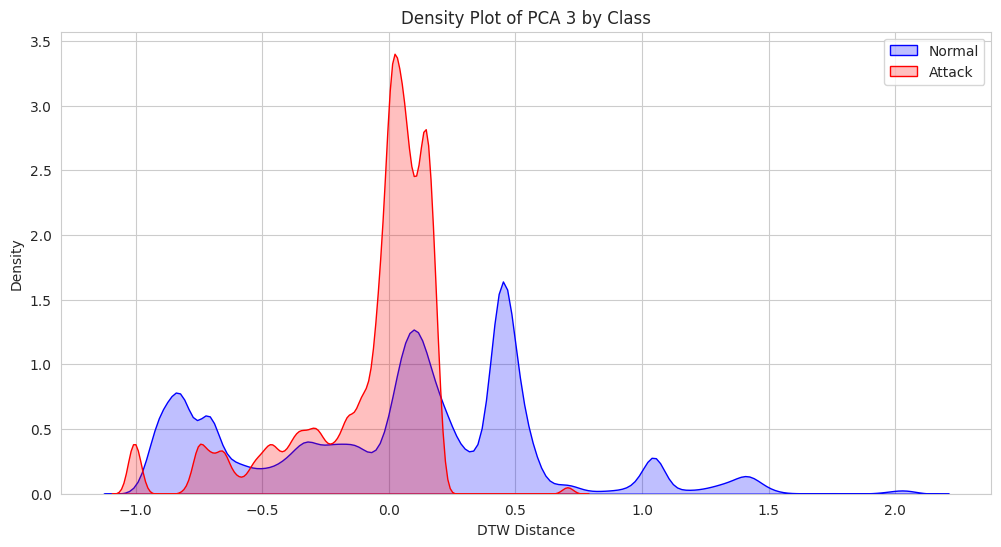

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.kdeplot(data=merged_principalDf[merged_principalDf['Attack'] == 0]['PCA 3'], label='Normal', shade=True, color='blue')
sns.kdeplot(data=merged_principalDf[merged_principalDf['Attack'] == 1]['PCA 3'], label='Attack', shade=True, color='red')
plt.xlabel('DTW Distance')
plt.ylabel('Density')
plt.title('Density Plot of PCA 3 by Class')
plt.legend()
plt.show()


<ipython-input-17-ee02f7d379c4>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=merged_principalDf[merged_principalDf['Attack'] == 0]['PCA 17'], label='Normal', shade=True, color='blue')
<ipython-input-17-ee02f7d379c4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=merged_principalDf[merged_principalDf['Attack'] == 1]['PCA 17'], label='Attack', shade=True, color='red')


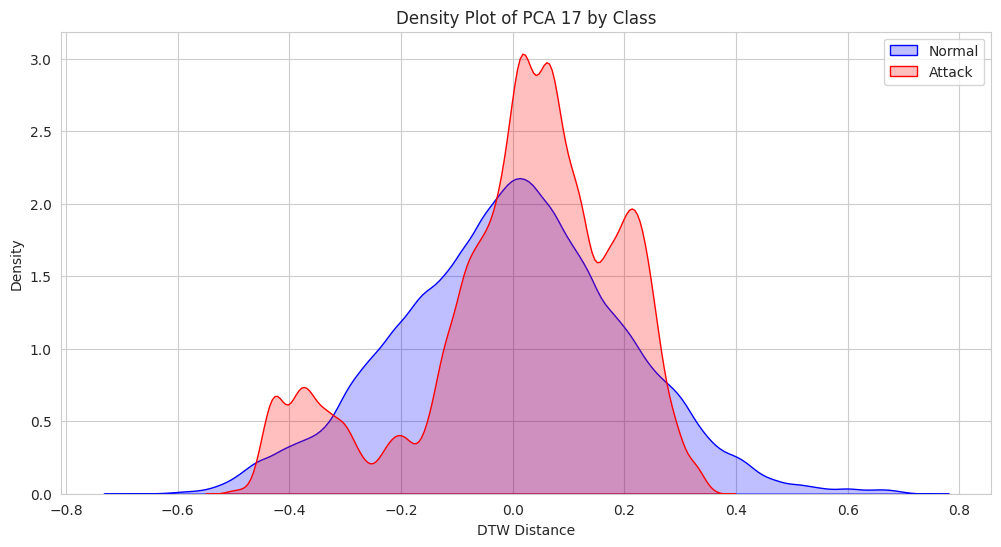

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.kdeplot(data=merged_principalDf[merged_principalDf['Attack'] == 0]['PCA 17'], label='Normal', shade=True, color='blue')
sns.kdeplot(data=merged_principalDf[merged_principalDf['Attack'] == 1]['PCA 17'], label='Attack', shade=True, color='red')
plt.xlabel('DTW Distance')
plt.ylabel('Density')
plt.title('Density Plot of PCA 17 by Class')
plt.legend()
plt.show()


<ipython-input-71-b72346e528d8>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=merged_df[merged_df['Attack'] == 0]['FastDTW_PCA 3_PCA 17'], label='Normal', shade=True, color='blue')
<ipython-input-71-b72346e528d8>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=merged_df[merged_df['Attack'] == 1]['FastDTW_PCA 3_PCA 17'], label='Attack', shade=True, color='red')


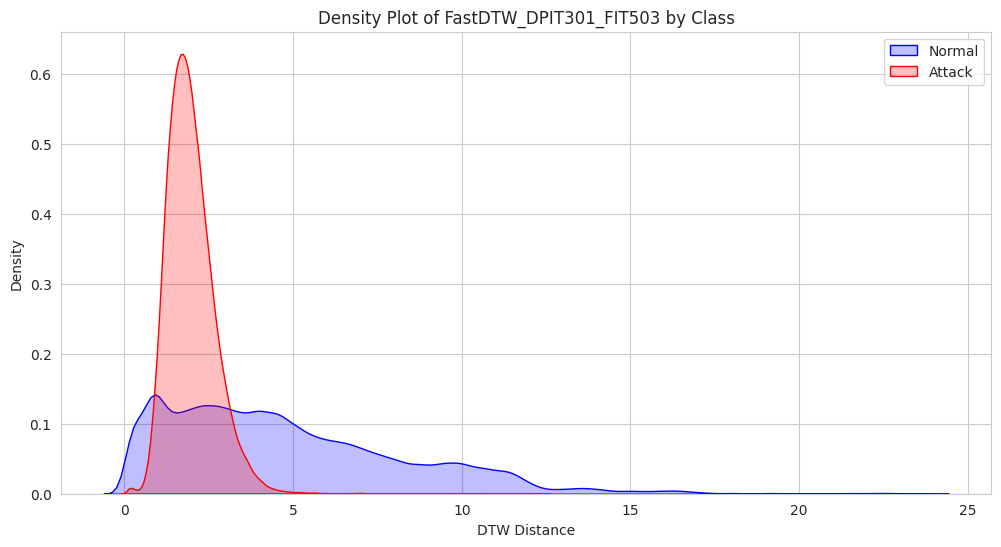

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.kdeplot(data=merged_df[merged_df['Attack'] == 0]['FastDTW_PCA 3_PCA 17'], label='Normal', shade=True, color='blue')
sns.kdeplot(data=merged_df[merged_df['Attack'] == 1]['FastDTW_PCA 3_PCA 17'], label='Attack', shade=True, color='red')
plt.xlabel('DTW Distance')
plt.ylabel('Density')
plt.title('Density Plot of DTW distance between PCA 3 and PCA 17 by Class')
plt.legend()
plt.show()


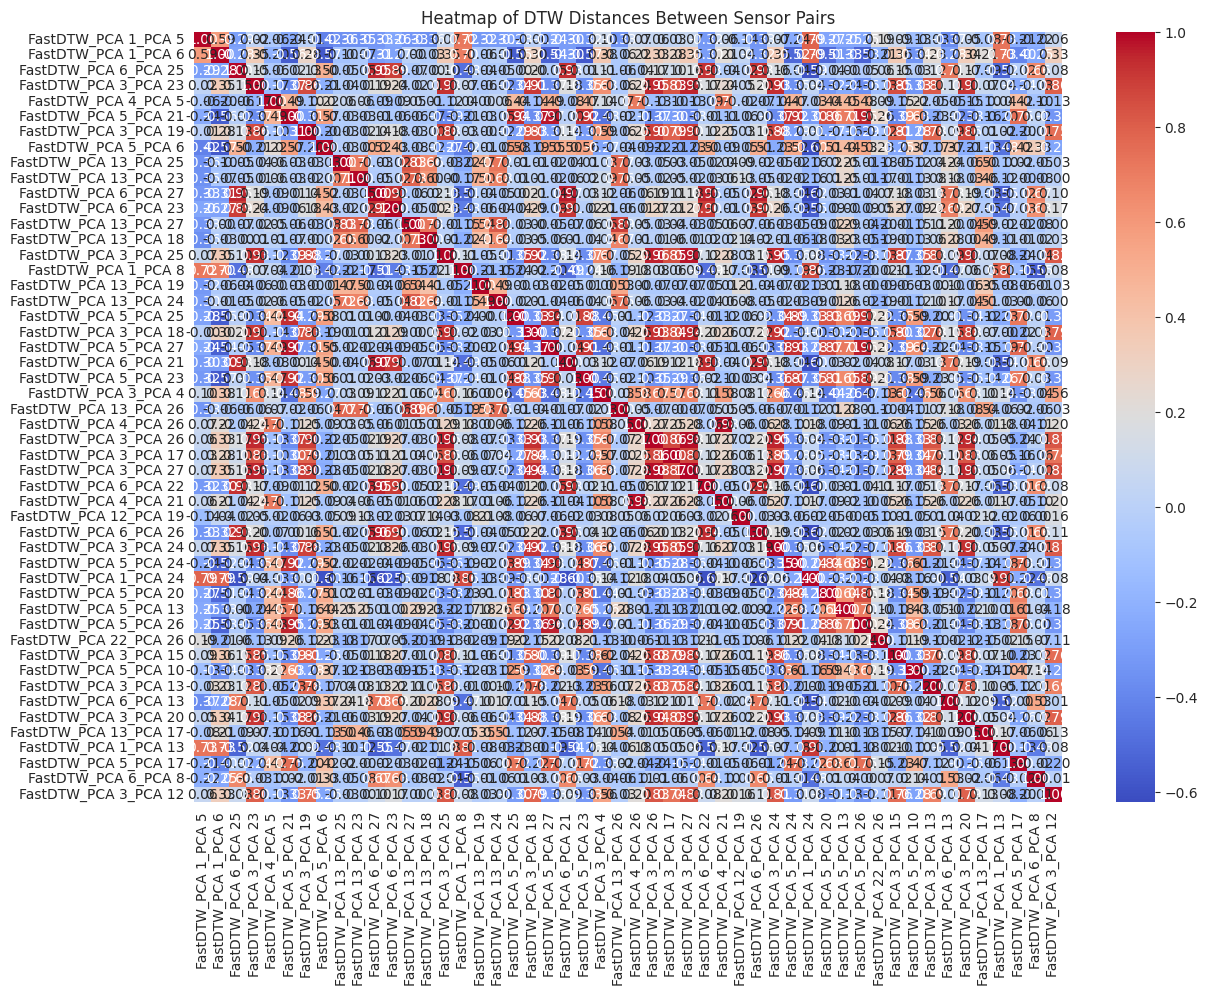

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(reduced_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of DTW Distances Between Sensor Pairs')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    reduced_df, y_df_aligned, test_size=0.3, random_state=42, shuffle=False
)

##Autoencoder + DTW

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    reduced_df, y_df_aligned, test_size=0.3, random_state=42
)

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_normal = X_train[y_train == 0]
n_features= X_train_normal.shape[1]

In [ ]:
def create_model_autoencoder(n_features, n_units=512, activation='sigmoid', dropout_rate=0.5, optimizer='adam'):

    input_data = Input(shape=(n_features,))
    encoded = Dense(units=n_units, activation=activation)(input_data)
    encoded = Dropout(dropout_rate)(encoded)

    decoded = Dense(units=n_units // 4, activation=activation)(encoded)
    decoded = Dense(units=n_features, activation='linear')(decoded)

    autoencoder = Model(inputs=input_data, outputs=decoded)
    autoencoder.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

    return autoencoder

In [ ]:
#Grid search
model = KerasRegressor(build_fn=create_model_autoencoder(n_features), verbose=1)

param_grid = {
    'n_units': [256, 512],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [256, 512],
    'epochs': [50,100]
    }

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
f1_scorer = make_scorer(f1_score)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, scoring=f1_scorer, verbose=2)
grid_result = grid.fit(X_train_normal, X_train_normal, validation_split=0.2, callbacks=[early_stopping])

In [ ]:
print("Best param: %s" % ( grid_result.best_params_))

In [ ]:
#Model with best param
# model=create_model_autoencoder(n_features, n_units=256, activation='relu')
model=create_model_autoencoder(n_features, n_units=512, activation='relu')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Training the model
history = model.fit(
    X_train_normal, X_train_normal,
    epochs=50,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
2962/2962 [==============================] - 18s 6ms/step - loss: 0.0025 - accuracy: 0.6803 - val_loss: 4.8844e-04 - val_accuracy: 0.8522
Epoch 2/50
2962/2962 [==============================] - 16s 5ms/step - loss: 0.0012 - accuracy: 0.7557 - val_loss: 4.3971e-04 - val_accuracy: 0.8537
Epoch 3/50
2962/2962 [==============================] - 16s 5ms/step - loss: 0.0011 - accuracy: 0.7733 - val_loss: 3.9275e-04 - val_accuracy: 0.8677
Epoch 4/50
2962/2962 [==============================] - 17s 6ms/step - loss: 9.9308e-04 - accuracy: 0.7849 - val_loss: 3.6294e-04 - val_accuracy: 0.8647
Epoch 5/50
2962/2962 [==============================] - 17s 6ms/step - loss: 9.4375e-04 - accuracy: 0.7899 - val_loss: 3.8500e-04 - val_accuracy: 0.8677
Epoch 6/50
2962/2962 [==============================] - 16s 5ms/step - loss: 9.0806e-04 - accuracy: 0.7934 - val_loss: 3.8516e-04 - val_accuracy: 0.8640
Epoch 7/50
2962/2962 [==============================] - 16s 5ms/step - loss: 8.8056e-04 - accu

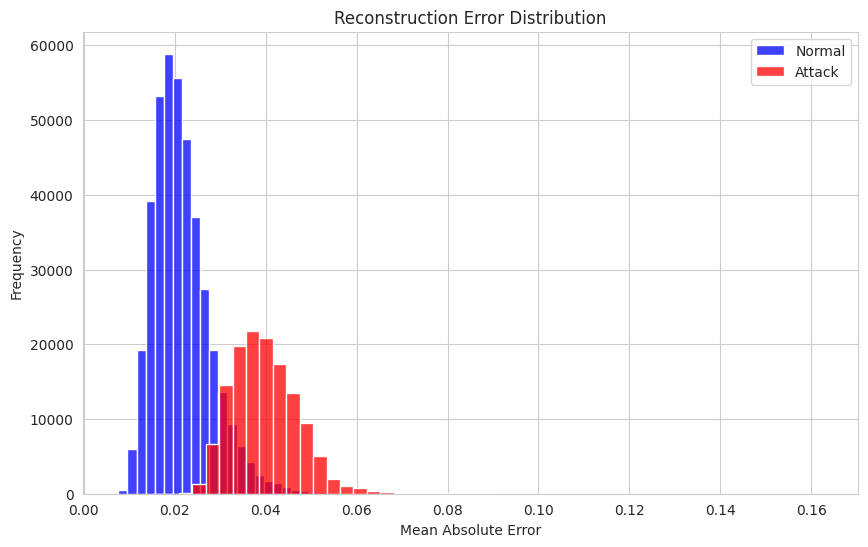

In [ ]:
mae = pd.Series(mae, index=y_test.index)

plt.figure(figsize=(10, 6))
sns.histplot(mae[y_test == 0], bins=50, color='blue', label='Normal')
sns.histplot(mae[y_test == 1], bins=50, color='red', label='Attack')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
X_test_predictions = model.predict(X_test)

mae = np.mean(np.abs(X_test_predictions - X_test), axis=1)

16920/16920 [==============================] - 25s 1ms/step


In [ ]:
#Find the best threshold
thresholds = np.linspace(min(mae), max(mae), num=100)
precision_list, recall_list, f1_list = [], [], []

best_f1 = 0
best_threshold = 0

for threshold in thresholds:
    predicted_anomalies = (mae > threshold).astype(int)
    precision = precision_score(y_test, predicted_anomalies)
    recall = recall_score(y_test, predicted_anomalies)
    f1 = f1_score(y_test, predicted_anomalies)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best F1 Score: {best_f1}")
print(f"Threshold for Best F1 Score: {best_threshold}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best F1 Score: 0.8436845343860837
Threshold for Best F1 Score: 0.031112067567128806


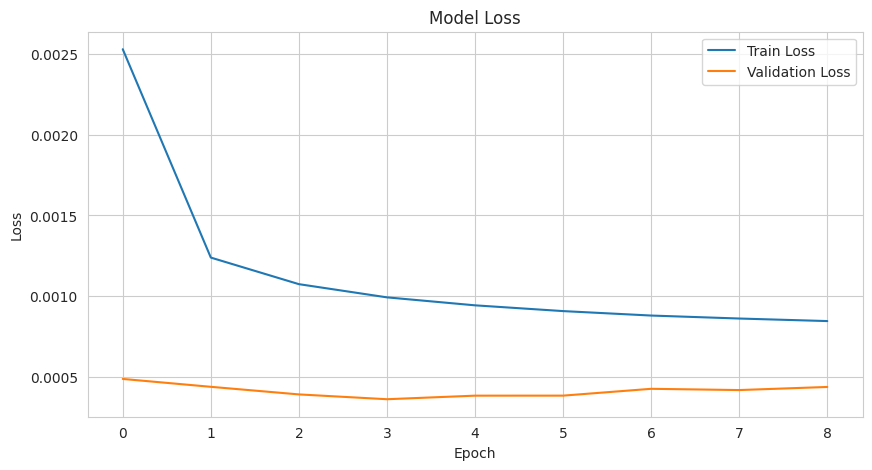

In [ ]:
plot_training_validation_loss(history)

In [ ]:
y_pred = (mae > best_threshold).astype(int)

evaluate_model_performance(y_test,y_pred)

Accuracy: 0.9165
Confusion Matrix:
[[374180  31663]
 [ 13555 122028]]
Precision: 0.7940
Recall: 0.9000
F1-score: 0.8437
AUC: 0.9110

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94    405843
           1       0.79      0.90      0.84    135583

    accuracy                           0.92    541426
   macro avg       0.88      0.91      0.89    541426
weighted avg       0.92      0.92      0.92    541426



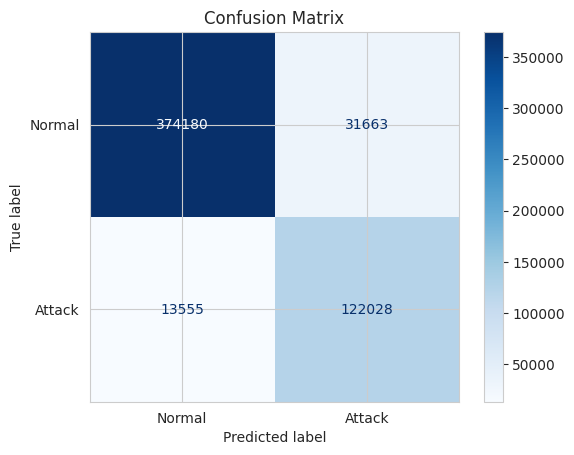

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)


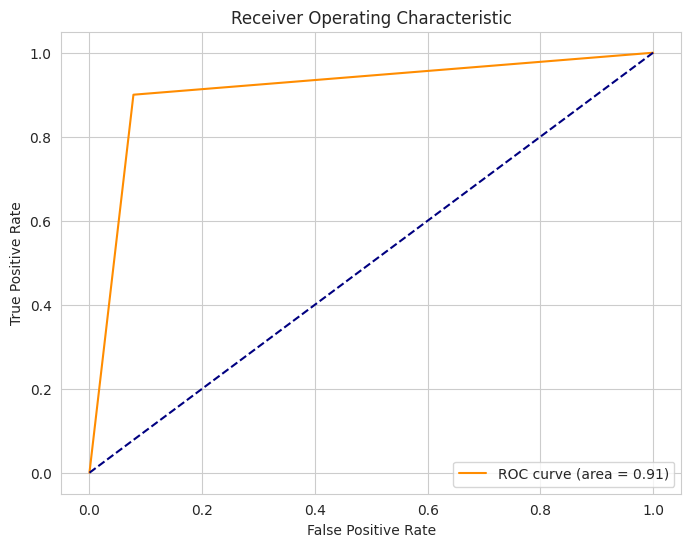

In [ ]:
plot_roc_curve(y_test, y_pred,'HAI_Autoencoder_DTW')

##Isolation Forest + DTW

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    reduced_df, y_df_aligned, test_size=0.3, random_state=42, shuffle=True
)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Calculate contamination as the proportion of outliers
outlier_count = np.sum(y_train == 1)
total_count = len(y_train)

contamination_estimate = outlier_count / total_count
print("Estimated contamination parameter: ", contamination_estimate)

Estimated contamination parameter:  0.24982209673346648


In [ ]:
# Train the Isolation Forest model
model = IsolationForest(n_estimators=100, max_samples=0.8, contamination=float(0.24),
                             max_features=0.8, bootstrap=True, n_jobs=-1, random_state=42, verbose=0)
model.fit(X_train)

# Predict anomaly scores
anomaly_scores = model.decision_function(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# Find the best threshold based on the F1 score
best_threshold = None
best_f1 = -1
thresholds = np.linspace(min(anomaly_scores), max(anomaly_scores), 100)

for threshold in thresholds:
    predicted_labels = np.where(anomaly_scores < threshold, 1, 0)
    current_f1 = f1_score(y_test, predicted_labels)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

# Make final predictions using the best threshold
final_predictions = np.where(anomaly_scores < best_threshold, 1, 0)

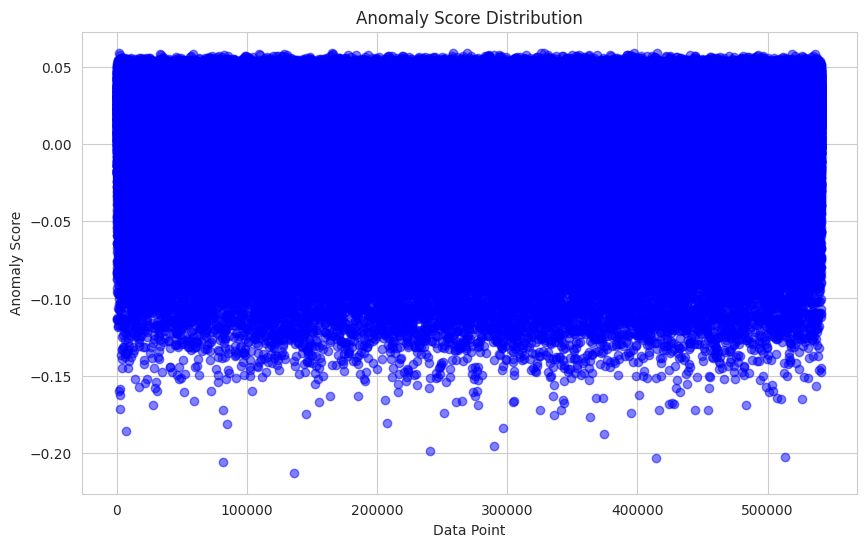

In [ ]:
# Anomaly Score Distribution
# Plotting Residuals
plt.figure(figsize=(10, 6))
plt.plot(anomaly_scores, marker='o', linestyle='None', color='b', alpha=0.5)
plt.xlabel('Data Point')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Score Distribution')
plt.grid(True)
plt.show()

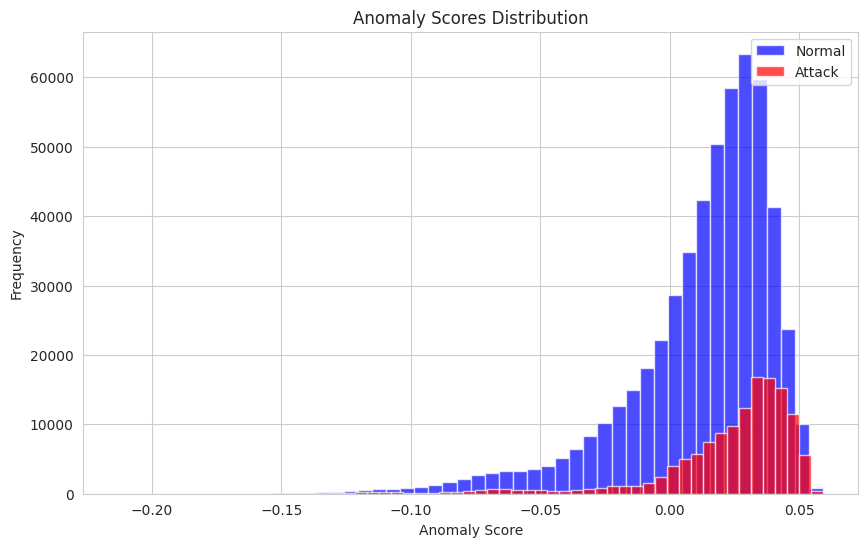

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.7, label='Normal')
plt.hist(anomaly_scores[y_test == 1], bins=50, color='red', alpha=0.7, label='Attack')
plt.title('Anomaly Scores Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Evaluate the model with the best threshold
print(f"Best Threshold: {best_threshold:.4f}")
evaluate_model_performance(y_test, final_predictions)


Best Threshold: 0.0162
Accuracy: 0.5930
Confusion Matrix:
[[151322 119188]
 [ 27723  62720]]
Precision: 0.3448
Recall: 0.6935
F1-score: 0.4606
AUC: 0.6264

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.56      0.67    270510
           1       0.34      0.69      0.46     90443

    accuracy                           0.59    360953
   macro avg       0.59      0.63      0.57    360953
weighted avg       0.72      0.59      0.62    360953



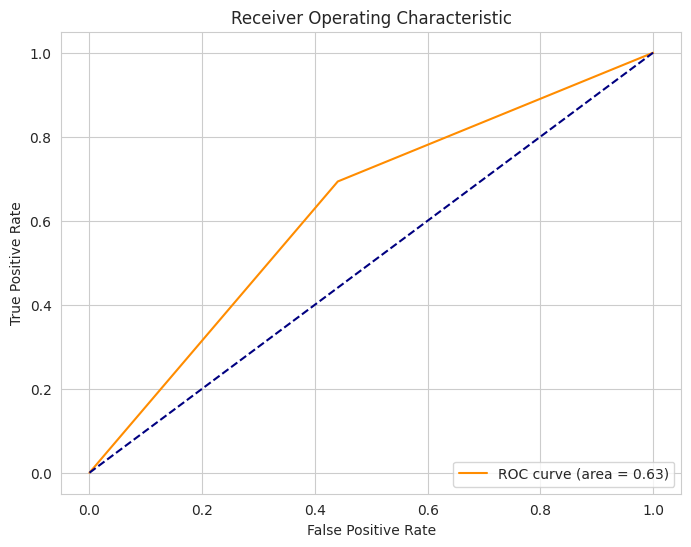

In [ ]:
plot_roc_curve(y_test, final_predictions,'HAI_IsolationF_DTW')

##LSTM +DTW

In [ ]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
def create_lstm_model(units, dropout_rate=0.2, optimizer='RMSprop'):
    model = Sequential([
        LSTM(units=units, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
        Dropout(dropout_rate),
        LSTM(units=units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    if optimizer == 'RMSprop':
        # opt = RMSprop(learning_rate=0.00001)
         opt = RMSprop(learning_rate=0.0000001)
    else:
        opt = optimizer
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:

from sklearn.metrics import confusion_matrix, precision_score, make_scorer,r2_score, recall_score, f1_score, roc_curve, roc_auc_score,accuracy_score,classification_report,precision_recall_fscore_support,precision_recall_curve,mean_squared_error

In [ ]:
#lstm_model = create_lstm_model(units=100,dropout_rate=0.2, optimizer='Adam')
from tensorflow.keras.optimizers import RMSprop

lstm_model = create_lstm_model(units=256,dropout_rate=0.5)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)
history=lstm_model.fit(X_train_reshaped, y_train, epochs=24, batch_size=1024, validation_split=0.2, verbose=2, callbacks=[early_stopping] )


Epoch 1/24
987/987 - 40s - loss: 0.7009 - accuracy: 0.4260 - val_loss: 0.6829 - val_accuracy: 0.7027 - 40s/epoch - 41ms/step
Epoch 2/24
987/987 - 36s - loss: 0.6898 - accuracy: 0.5323 - val_loss: 0.6700 - val_accuracy: 0.9837 - 36s/epoch - 36ms/step
Epoch 3/24
987/987 - 36s - loss: 0.6787 - accuracy: 0.6379 - val_loss: 0.6572 - val_accuracy: 0.9988 - 36s/epoch - 36ms/step
Epoch 4/24
987/987 - 36s - loss: 0.6678 - accuracy: 0.7344 - val_loss: 0.6446 - val_accuracy: 1.0000 - 36s/epoch - 36ms/step
Epoch 5/24
987/987 - 35s - loss: 0.6570 - accuracy: 0.8145 - val_loss: 0.6321 - val_accuracy: 1.0000 - 35s/epoch - 36ms/step
Epoch 6/24
987/987 - 37s - loss: 0.6462 - accuracy: 0.8763 - val_loss: 0.6197 - val_accuracy: 1.0000 - 37s/epoch - 37ms/step
Epoch 7/24
987/987 - 36s - loss: 0.6356 - accuracy: 0.9204 - val_loss: 0.6074 - val_accuracy: 1.0000 - 36s/epoch - 36ms/step
Epoch 8/24
987/987 - 35s - loss: 0.6251 - accuracy: 0.9496 - val_loss: 0.5952 - val_accuracy: 1.0000 - 35s/epoch - 35ms/step


In [ ]:
predictions = lstm_model.predict(X_test_reshaped)
#Find best treshold
precisions, recalls, thresholds = precision_recall_curve(y_test, predictions)

# Calculate the F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
f1_scores = np.nan_to_num(f1_scores)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print("Best threshold: ", optimal_threshold)
print("Best F1-score: ", f1_scores[optimal_idx])

predictions_binary1 = (predictions >optimal_threshold).astype(int)

16920/16920 [==============================] - 59s 3ms/step
Best threshold:  0.34251082
Best F1-score:  0.9782858238214008


<ipython-input-60-e2f6dbc3f688>:6: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


In [ ]:
evaluate_model_performance(y_test ,predictions_binary1)

Accuracy: 0.9640
Confusion Matrix:
[[ 83037  19229]
 [   256 438904]]
Precision: 0.9580
Recall: 0.9994
F1-score: 0.9783
AUC: 0.9057

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89    102266
           1       0.96      1.00      0.98    439160

    accuracy                           0.96    541426
   macro avg       0.98      0.91      0.94    541426
weighted avg       0.97      0.96      0.96    541426



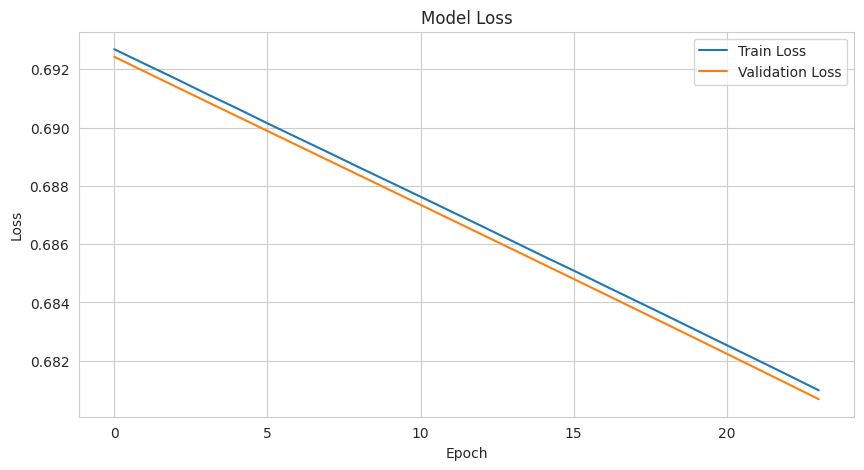

In [ ]:
plot_training_validation_loss(history)

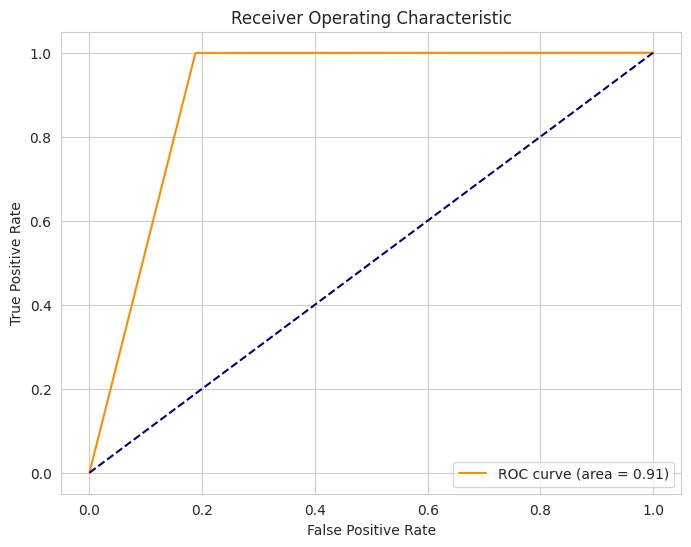

In [ ]:
plot_roc_curve(y_test, predictions_binary1,'HAI2_LSTM_DTW')

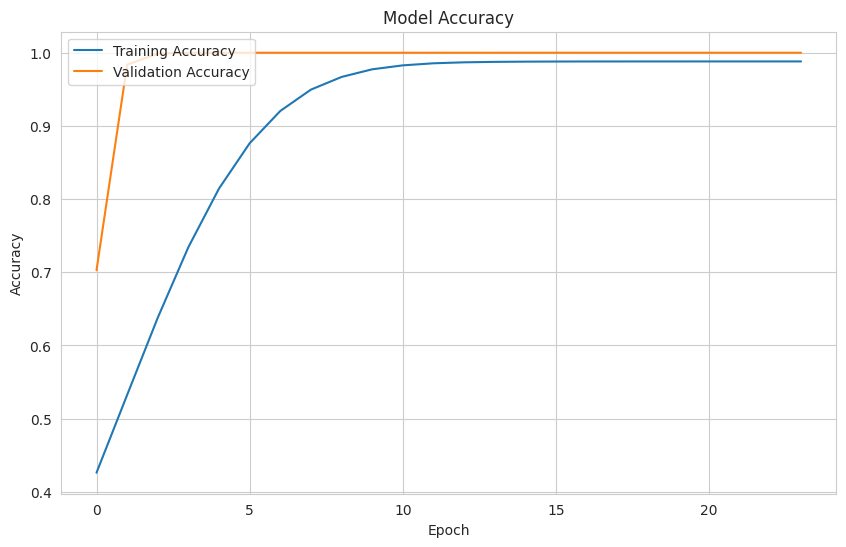

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

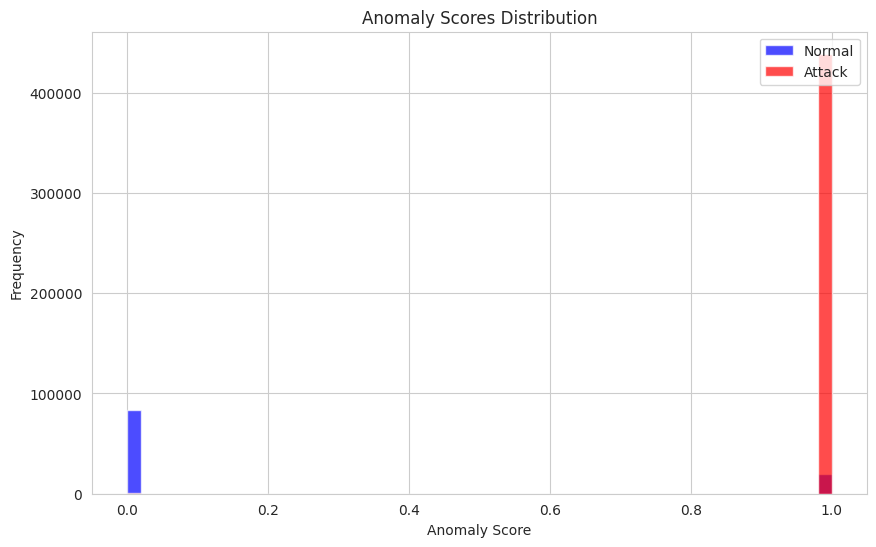

In [ ]:
anomaly_scores = predictions_binary1

plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores[y_test == 0], bins=50, color='blue', alpha=0.7, label='Normal')
plt.hist(anomaly_scores[y_test == 1], bins=50, color='red', alpha=0.7, label='Attack')
plt.title('Anomaly Scores Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

#**Visualizations**

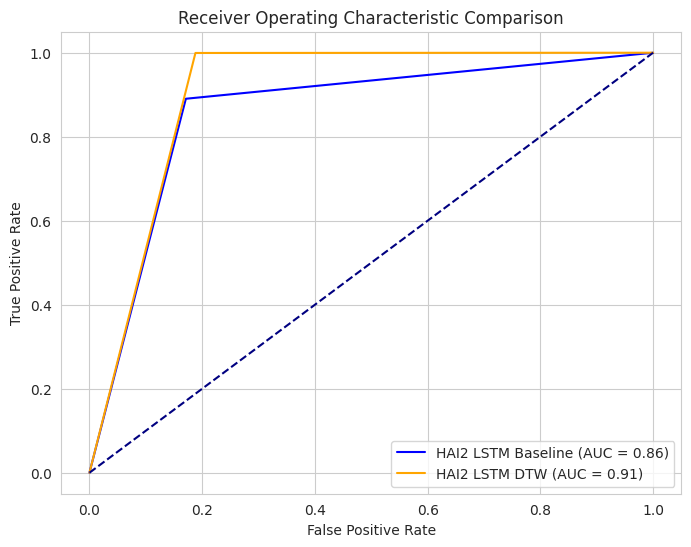

In [ ]:
from sklearn.metrics import auc
def plot_combined_roc_curve(file1, file2, label1, label2):
    # Load ROC data from CSV files
    roc_data1 = pd.read_csv(file1)
    roc_data2 = pd.read_csv(file2)

    # Calculate AUC from ROC data
    auc1 = auc(roc_data1['fpr'], roc_data1['tpr'])
    auc2 = auc(roc_data2['fpr'], roc_data2['tpr'])

    # Set up the plot
    plt.figure(figsize=(8, 6))

    # Plot ROC curve for the first model
    plt.plot(roc_data1['fpr'], roc_data1['tpr'], color='blue', label=f'{label1} (AUC = {auc1:.2f})')

    # Plot ROC curve for the second model
    plt.plot(roc_data2['fpr'], roc_data2['tpr'], color='orange', label=f'{label2} (AUC = {auc2:.2f})')

    # Plot the random chance line
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

    # Adding labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Comparison')
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

# File paths (adjust these paths if your CSV files are located elsewhere)
file_path1 = '/content/drive/My Drive/souad_models/HAI2_LSTM_Baseline_roc_curve.csv'
file_path2 = '/content/drive/My Drive/souad_models/HAI2_LSTM_DTW_roc_curve.csv'

# Labels for the curves
label1 = 'HAI2 LSTM Baseline'
label2 = 'HAI2 LSTM DTW'

# Call the function to plot ROC curves
plot_combined_roc_curve(file_path1, file_path2, label1, label2)

In [ ]:
pip install matplotlib pandas seaborn


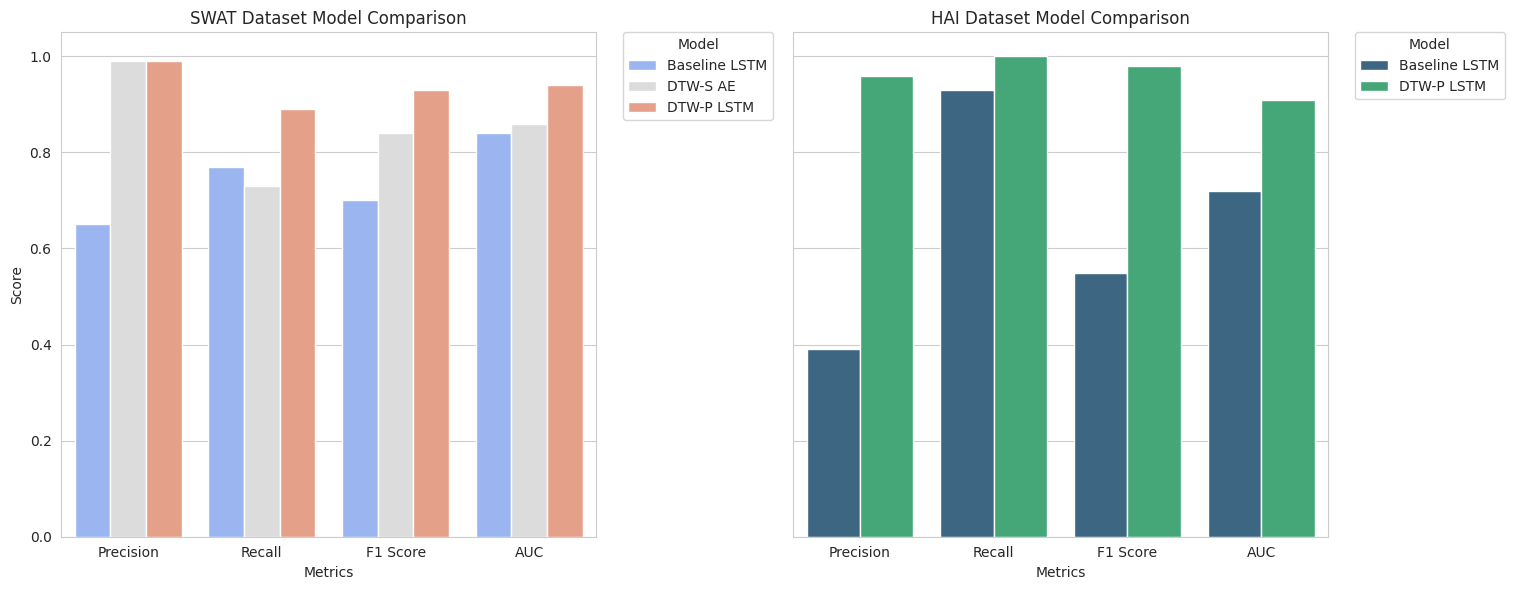

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data preparation
data = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'AUC']*5,
    'Score': [0.65, 0.77, 0.70, 0.84,  # LSTM Baseline
              0.99, 0.73, 0.84, 0.86,  # DTW-S AE
              0.99, 0.89, 0.93, 0.94,  # DTW-P LSTM
              0.39, 0.93, 0.55, 0.72,  # LSTM Baseline HAI
              0.96, 1.00, 0.98, 0.91], # DTW-P LSTM HAI
    'Model': ['Baseline LSTM', 'Baseline LSTM', 'Baseline LSTM', 'Baseline LSTM',
              'DTW-S AE', 'DTW-S AE', 'DTW-S AE', 'DTW-S AE',
              'DTW-P LSTM', 'DTW-P LSTM', 'DTW-P LSTM', 'DTW-P LSTM',
              'Baseline LSTM', 'Baseline LSTM', 'Baseline LSTM', 'Baseline LSTM',
              'DTW-P LSTM', 'DTW-P LSTM', 'DTW-P LSTM', 'DTW-P LSTM'],
    'Dataset': ['SWAT']*12 + ['HAI']*8
}

df = pd.DataFrame(data)

# Model order for plotting, removing dataset names
model_order_swat = ['Baseline LSTM', 'DTW-S AE', 'DTW-P LSTM']
model_order_hai = ['Baseline LSTM', 'DTW-P LSTM']

# Set up the plot with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.set_style("whitegrid")

# SWAT plot
sns.barplot(x='Metric', y='Score', hue='Model', data=df[df['Dataset'] == 'SWAT'], ax=axes[0], palette='coolwarm', order=['Precision', 'Recall', 'F1 Score', 'AUC'], hue_order=model_order_swat)
axes[0].set_title('SWAT Dataset Model Comparison')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Metrics')
axes[0].legend(title='Model', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# HAI plot
sns.barplot(x='Metric', y='Score', hue='Model', data=df[df['Dataset'] == 'HAI'], ax=axes[1], palette='viridis', order=['Precision', 'Recall', 'F1 Score', 'AUC'], hue_order=model_order_hai)
axes[1].set_title('HAI Dataset Model Comparison')
axes[1].set_ylabel('')
axes[1].set_xlabel('Metrics')
axes[1].legend(title='Model', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# General styling
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin of the layout

# Show plot
plt.show()


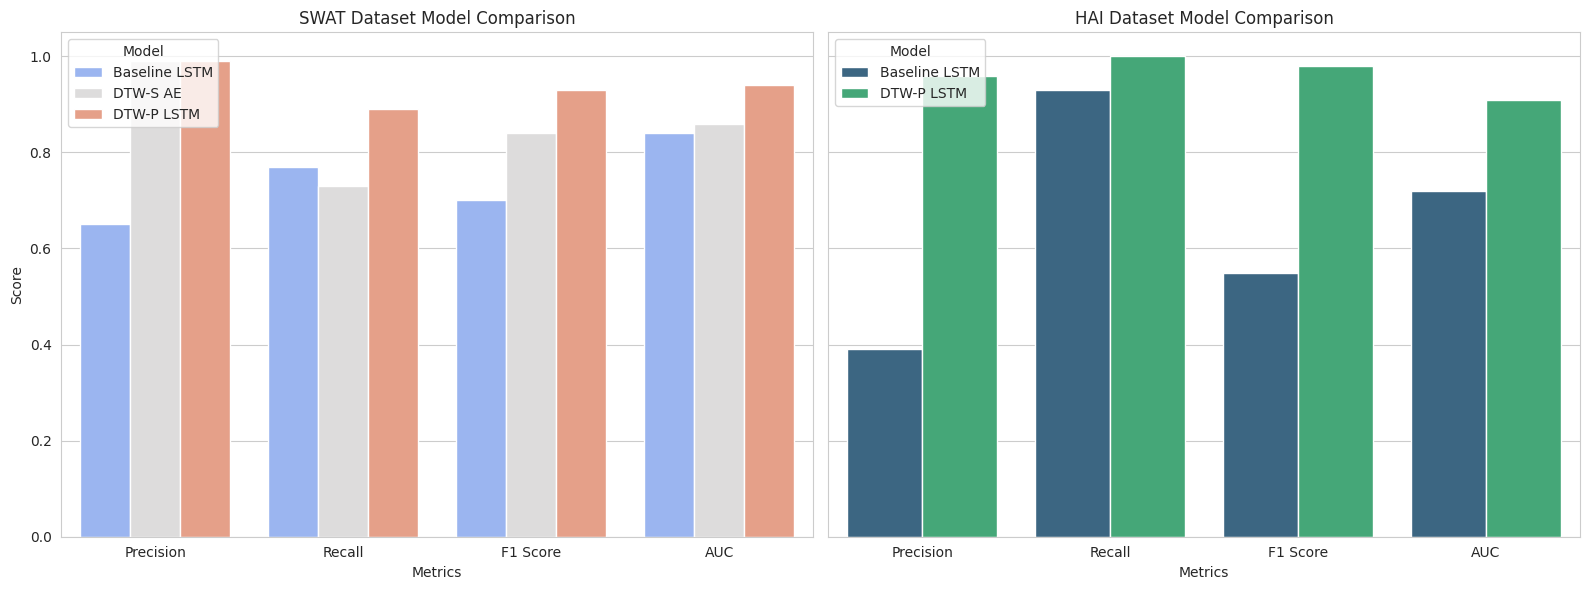

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data preparation
data = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'AUC']*5,
    'Score': [0.65, 0.77, 0.70, 0.84,  # LSTM Baseline
              0.99, 0.73, 0.84, 0.86,  # DTW-S AE,
              0.99, 0.89, 0.93, 0.94,  # DTW-P LSTM,
              0.39, 0.93, 0.55, 0.72,  # LSTM Baseline HAI
              0.96, 1.00, 0.98, 0.91], # DTW-P LSTM HAI
    'Model': ['Baseline LSTM', 'Baseline LSTM', 'Baseline LSTM', 'Baseline LSTM',
              'DTW-S AE', 'DTW-S AE', 'DTW-S AE', 'DTW-S AE',
              'DTW-P LSTM', 'DTW-P LSTM', 'DTW-P LSTM', 'DTW-P LSTM',
              'Baseline LSTM', 'Baseline LSTM', 'Baseline LSTM', 'Baseline LSTM',
              'DTW-P LSTM', 'DTW-P LSTM', 'DTW-P LSTM', 'DTW-P LSTM'],
    'Dataset': ['SWAT']*12 + ['HAI']*8
}

df = pd.DataFrame(data)

# Model order for plotting, removing dataset names
model_order_swat = ['Baseline LSTM', 'DTW-S AE', 'DTW-P LSTM']
model_order_hai = ['Baseline LSTM', 'DTW-P LSTM']

# Set up the plot with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.set_style("whitegrid")

# SWAT plot
sns.barplot(x='Metric', y='Score', hue='Model', data=df[df['Dataset'] == 'SWAT'], ax=axes[0], palette='coolwarm', order=['Precision', 'Recall', 'F1 Score', 'AUC'], hue_order=model_order_swat)
axes[0].set_title('SWAT Dataset Model Comparison')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Metrics')
axes[0].legend(title='Model', loc='upper left')

# HAI plot
sns.barplot(x='Metric', y='Score', hue='Model', data=df[df['Dataset'] == 'HAI'], ax=axes[1], palette='viridis', order=['Precision', 'Recall', 'F1 Score', 'AUC'], hue_order=model_order_hai)
axes[1].set_title('HAI Dataset Model Comparison')
axes[1].set_ylabel('')
axes[1].set_xlabel('Metrics')
axes[1].legend(title='Model', loc='upper left')

# General styling
plt.tight_layout()

# Show plot
plt.show()
